# Introduction to tensor slicing

## 1. Setup

In [1]:
import tensorflow as tf
import numpy as np

print("The version of Tensorflow: {}".format(tf.__version__))

The version of Tensorflow: 2.4.1


## 2. Extract tensor slices

In [2]:
# Perform NumPy-like tensor slicing using tf.slice.

t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])

print(tf.slice(t1,
               begin=[1],
               size=[3]))

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


In [3]:
# Alternatively, you can use a more Pythonic syntax. Note that tensor slices are evenly spaced over a start-stop range.

print(t1[1:4])

tf.Tensor([1 2 3], shape=(3,), dtype=int32)


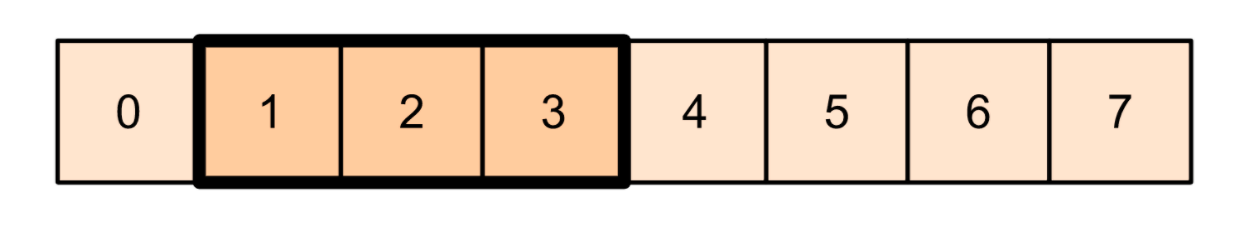

In [5]:
from IPython.display import Image,display
display(Image(filename="./image/slicing1.png", embed=True))

In [6]:
print(t1[-3:])

tf.Tensor([5 6 7], shape=(3,), dtype=int32)


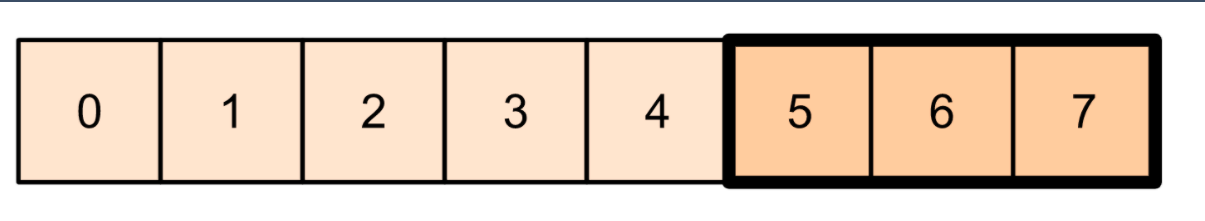

In [7]:
from IPython.display import Image,display
display(Image(filename="./image/slicing2.png", embed=True))

In [8]:
# For 2-dimensional tensors,you can use something like:

t2 = tf.constant([[0, 1, 2, 3, 4],
                  [5, 6, 7, 8, 9],
                  [10, 11, 12, 13, 14],
                  [15, 16, 17, 18, 19]])

print(t2[:-1, 1:3])

tf.Tensor(
[[ 1  2]
 [ 6  7]
 [11 12]], shape=(3, 2), dtype=int32)


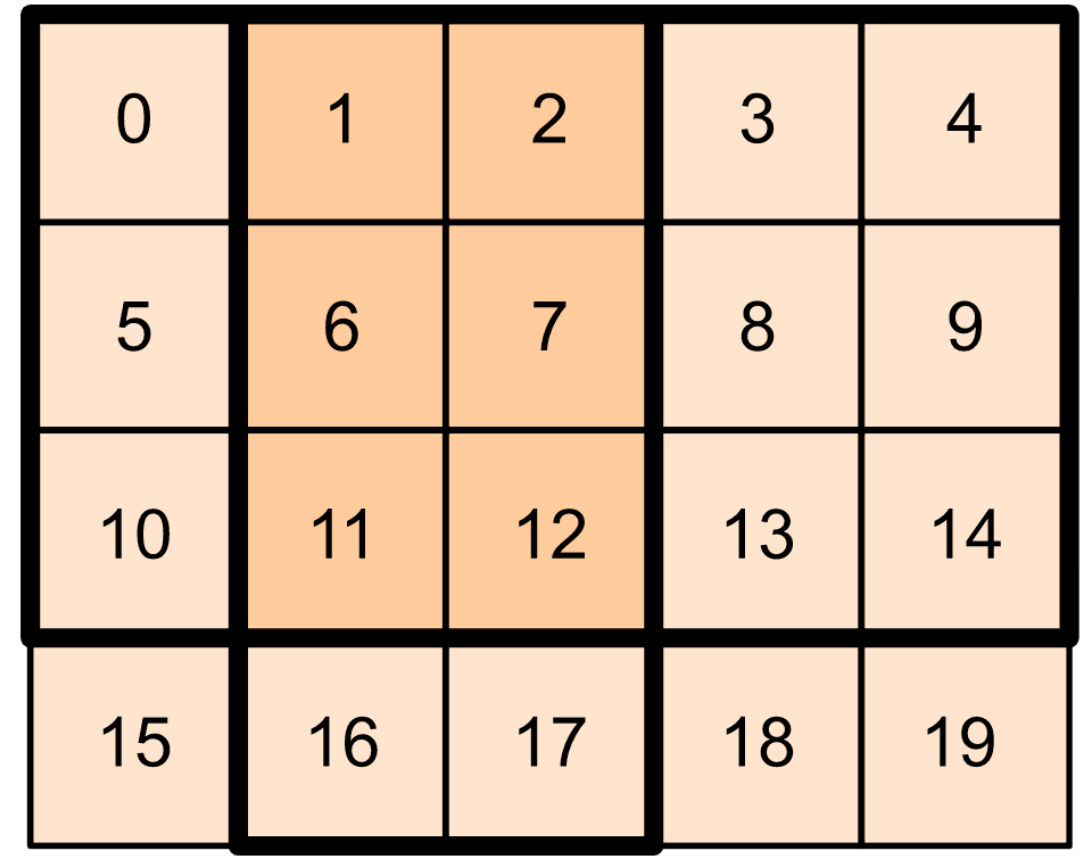

In [9]:
from IPython.display import Image,display
display(Image(filename="./image/slicing3.png", embed=True))

In [10]:
# You can use tf.slice on higher dimensional tensors as well.

t3 = tf.constant([[[1, 3, 5, 7],
                   [9, 11, 13, 15]],
                  [[17, 19, 21, 23],
                   [25, 27, 29, 31]]
                  ])

print(tf.slice(t3,
               begin=[1, 1, 0],
               size=[1, 1, 2]))

tf.Tensor([[[25 27]]], shape=(1, 1, 2), dtype=int32)


In [11]:
print(tf.gather(t1,
                indices=[0, 3, 6]))

# This is similar to doing

t1[::3]

tf.Tensor([0 3 6], shape=(3,), dtype=int32)


<tf.Tensor: shape=(3,), dtype=int32, numpy=array([0, 3, 6])>

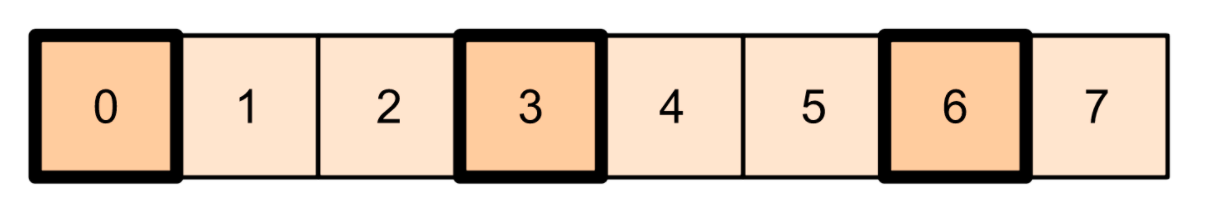

In [12]:
from IPython.display import Image,display
display(Image(filename="./image/slicing4.png", embed=True))

In [13]:
# tf.gather does not require indices to be evenly spaced.

alphabet = tf.constant(list('abcdefghijklmnopqrstuvwxyz'))

print(tf.gather(alphabet,
                indices=[2, 0, 19, 18]))

tf.Tensor([b'c' b'a' b't' b's'], shape=(4,), dtype=string)


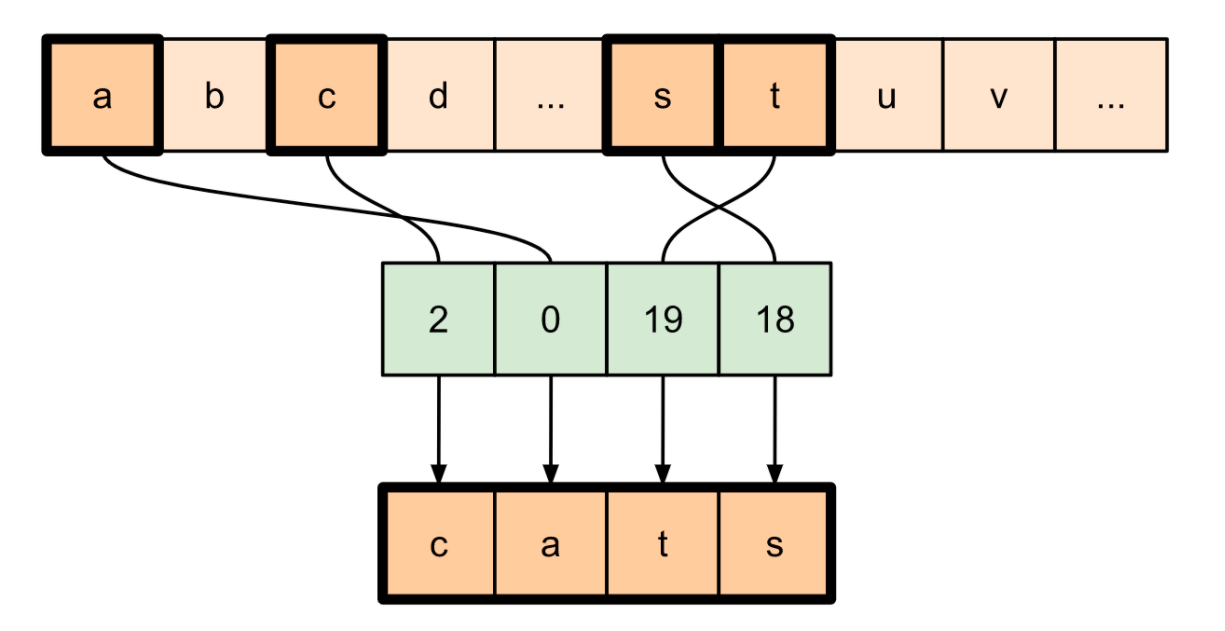

In [14]:
from IPython.display import Image,display
display(Image(filename="./image/slicing5.png", embed=True))

In [15]:
t4 = tf.constant([[0, 5],
                  [1, 6],
                  [2, 7],
                  [3, 8],
                  [4, 9]])

print(tf.gather_nd(t4,
                   indices=[[2], [3], [0]]))

tf.Tensor(
[[2 7]
 [3 8]
 [0 5]], shape=(3, 2), dtype=int32)


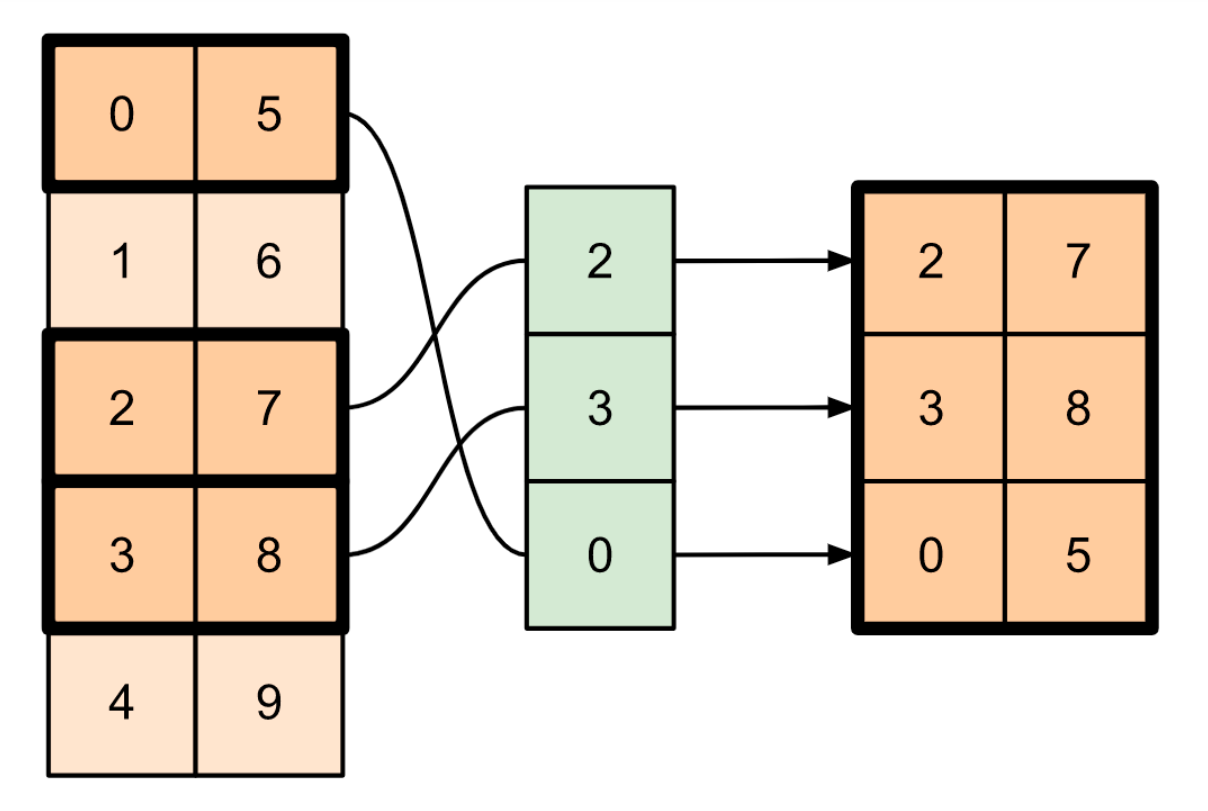

In [16]:
from IPython.display import Image,display
display(Image(filename="./image/slicing6.png", embed=True))

In [17]:
t5 = np.reshape(np.arange(18), [2, 3, 3])

print(tf.gather_nd(t5,
                   indices=[[0, 0, 0], [1, 2, 1]]))

tf.Tensor([ 0 16], shape=(2,), dtype=int32)


In [18]:
# Return a list of two matrices

print(tf.gather_nd(t5,
                   indices=[[[0, 0], [0, 2]], [[1, 0], [1, 2]]]))

tf.Tensor(
[[[ 0  1  2]
  [ 6  7  8]]

 [[ 9 10 11]
  [15 16 17]]], shape=(2, 2, 3), dtype=int32)


In [19]:
# Return one matrix

print(tf.gather_nd(t5,
                   indices=[[0, 0], [0, 2], [1, 0], [1, 2]]))

tf.Tensor(
[[ 0  1  2]
 [ 6  7  8]
 [ 9 10 11]
 [15 16 17]], shape=(4, 3), dtype=int32)


## 3. Insert data into tensors

In [20]:
# Use tf.scatter_nd to insert data at specific slices/indices of a tensor. 
# Note that the tensor into which you insert values is zero-initialized.

t6 = tf.constant([10])
indices = tf.constant([[1], [3], [5], [7], [9]])
data = tf.constant([2, 4, 6, 8, 10])

print(tf.scatter_nd(indices=indices,
                    updates=data,
                    shape=t6))

tf.Tensor([ 0  2  0  4  0  6  0  8  0 10], shape=(10,), dtype=int32)


In [21]:
# Gather values from one tensor by specifying indices

new_indices = tf.constant([[0, 2], [2, 1], [3, 3]])
t7 = tf.gather_nd(t2, indices=new_indices)

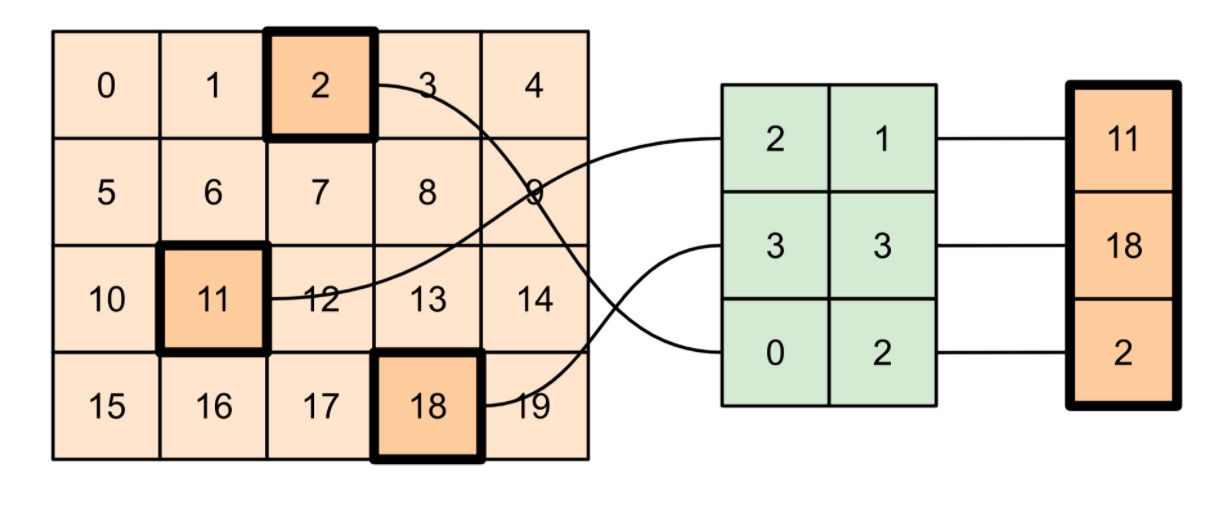

In [22]:
from IPython.display import Image,display
display(Image(filename="./image/slicing7.png", embed=True))

In [23]:
# Add these values into a new tensor

t8 = tf.scatter_nd(indices=new_indices, updates=t7, shape=tf.constant([4, 5]))

print(t8)

tf.Tensor(
[[ 0  0  2  0  0]
 [ 0  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  0 18  0]], shape=(4, 5), dtype=int32)


In [24]:
# This is similar to:

t9 = tf.SparseTensor(indices=[[0, 2], [2, 1], [3, 3]],
                     values=[2, 11, 18],
                     dense_shape=[4, 5])

print(t9)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [2 1]
 [3 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([ 2 11 18], shape=(3,), dtype=int32), dense_shape=tf.Tensor([4 5], shape=(2,), dtype=int64))


In [25]:
# Convert the sparse tensor into a dense tensor

t10 = tf.sparse.to_dense(t9)

print(t10)

tf.Tensor(
[[ 0  0  2  0  0]
 [ 0  0  0  0  0]
 [ 0 11  0  0  0]
 [ 0  0  0 18  0]], shape=(4, 5), dtype=int32)


In [26]:
# To insert data into a tensor with pre-existing values, use tf.tensor_scatter_nd_add.

t11 = tf.constant([[2, 7, 0],
                   [9, 0, 1],
                   [0, 3, 8]])

# Convert the tensor into a magic square by inserting numbers at appropriate indices

t12 = tf.tensor_scatter_nd_add(t11,
                               indices=[[0, 2], [1, 1], [2, 0]],
                               updates=[6, 5, 4])

print(t12)

tf.Tensor(
[[2 7 6]
 [9 5 1]
 [4 3 8]], shape=(3, 3), dtype=int32)


In [27]:
# Similarly, use tf.tensor_scatter_nd_sub to subtract values from a tensor with pre-existing values.

# Convert the tensor into an identity matrix

t13 = tf.tensor_scatter_nd_sub(t11,
                               indices=[[0, 0], [0, 1], [1, 0], [1, 1], [1, 2], [2, 1], [2, 2]],
                               updates=[1, 7, 9, -1, 1, 3, 7])

print(t13)

tf.Tensor(
[[1 0 0]
 [0 1 0]
 [0 0 1]], shape=(3, 3), dtype=int32)


In [28]:
# Use tf.tensor_scatter_nd_min to copy element-wise minimum values from one tensor to another.

t14 = tf.constant([[-2, -7, 0],
                   [-9, 0, 1],
                   [0, -3, -8]])

t15 = tf.tensor_scatter_nd_min(t14,
                               indices=[[0, 2], [1, 1], [2, 0]],
                               updates=[-6, -5, -4])

print(t15)

tf.Tensor(
[[-2 -7 -6]
 [-9 -5  1]
 [-4 -3 -8]], shape=(3, 3), dtype=int32)


In [29]:
# Similarly, use tf.tensor_scatter_nd_max to copy element-wise maximum values from one tensor to another.

t16 = tf.tensor_scatter_nd_max(t14,
                               indices=[[0, 2], [1, 1], [2, 0]],
                               updates=[6, 5, 4])

print(t16)

tf.Tensor(
[[-2 -7  6]
 [-9  5  1]
 [ 4 -3 -8]], shape=(3, 3), dtype=int32)


## 4. Further reading and resources

# reference

### https://tensorflow.google.cn/guide/tensor_slicing